<a id="4"></a>
<font color="blue" size=+2.5><b>1. Library Import</b></font>

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import Image
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing the dataset
!unzip gdrive/My\Drive/Capstone\ Project/Soildata.zip

Archive:  gdrive/MyDrive/Capstone Project/Soildata.zip
replace classifier.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: classifier.pkl          
  inflating: Crop_recommendation.csv  
  inflating: IMG-8370.JPG            
  inflating: IMG-8372.jpg            
  inflating: JXCT.CSV                
  inflating: Soil parameters.csv     
  inflating: Soil parameters.xlsx    
  inflating: Soil types/Black Soil/10.jpg  
  inflating: Soil types/Black Soil/11.jpg  
  inflating: Soil types/Black Soil/12.jpg  
  inflating: Soil types/Black Soil/13.jpg  
  inflating: Soil types/Black Soil/14.jpg  
  inflating: Soil types/Black Soil/15.jpg  
  inflating: Soil types/Black Soil/16.jpg  
  inflating: Soil types/Black Soil/17.jpg  
  inflating: Soil types/Black Soil/18.jpg  
  inflating: Soil types/Black Soil/19.jpg  
  inflating: Soil types/Black Soil/2.jpg  
  inflating: Soil types/Black Soil/20.jpg  
  inflating: Soil types/Black Soil/21.jpg  
  inflating: Soil types/Black Soil/22.jpg  

In [ ]:
x  = 'Soil types'
path = Path(x)

<a id="6"></a>
<font color="blue" size=+2.5><b>2 Data Loading For training</b></font>
<br/>

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

<a id="7"></a>
<font color="blue" size=+2.5><b>3 Data Explorations</b></font>
<br/>

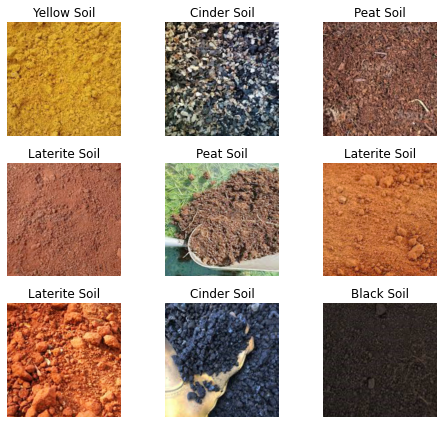

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

<a id="9"></a>
<font color="blue" size=+2.5><b>4 Create Model</b></font>
<br/>

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('models'),path = Path("."))

<a id="10"></a>
<font color="blue" size=+2.5><b>5 Finding LR</b></font>
<br/>

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


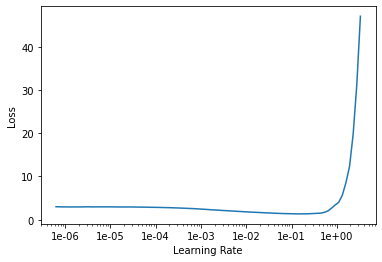

In [ ]:
learn.lr_find(stop_div=False)
learn.recorder.plot(suggestions=True)

<a id="11"></a>
<font color="blue" size=+2.5><b>6 Train Model</b></font>
<br/>

In [ ]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,accuracy,time
0,3.186008,2.267648,0.241379,00:01
1,2.905523,1.982700,0.344828,00:01
2,2.800485,1.819053,0.344828,00:01
3,2.674169,1.618089,0.413793,00:01
4,2.586907,1.448725,0.448276,00:01
5,2.375659,1.333397,0.517241,00:01
6,2.192240,1.166096,0.586207,00:01
7,2.033308,0.977706,0.586207,00:01
8,1.880206,0.825029,0.620690,00:01
9,1.763442,0.681655,0.655172,00:01


# <a id="13"></a>
<font color="blue" size=+2.5><b>7 Interpret the results</b></font>

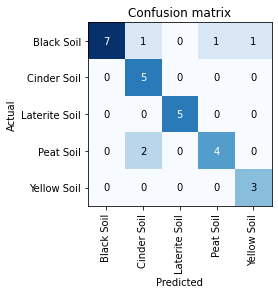

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

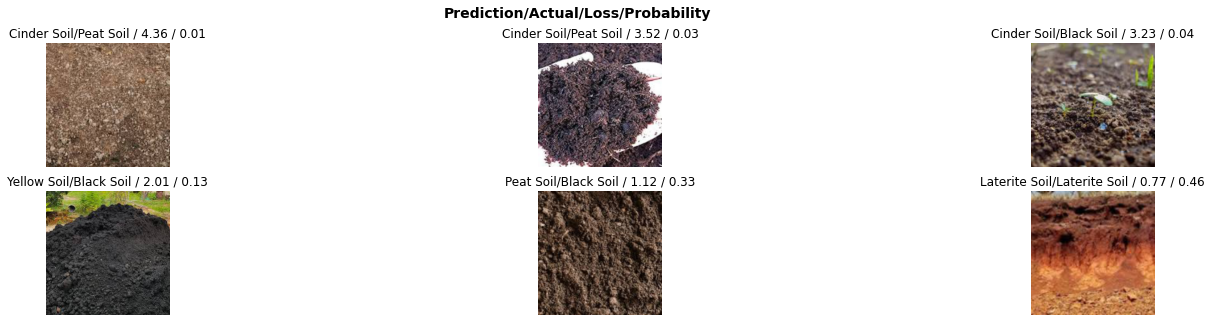

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="14"></a>
<font color="blue" size=+2.5><b>8 Prediction Using Trained Model</b></font>

Laterite Soil


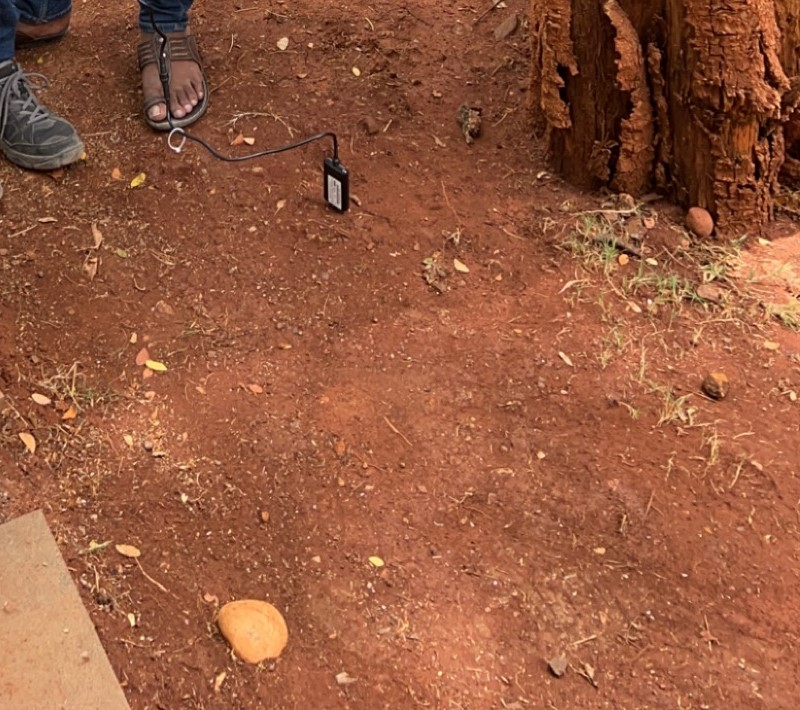

In [ ]:
img = open_image('IMG-8370.JPG')
print(learn.predict(img)[0])
Image(filename='IMG-8370.JPG')

In [ ]:
soil_type = int(learn.predict(img)[0])

In [ ]:
soil_parameters = pd.read_csv("Soil parameters.csv")

In [ ]:
final_params=[]
soil_type

for i in soil_parameters["Type"]:

  if i is soil_type:
    final_params = (soil_parameters.iloc[i])
#print(final_params)



In [ ]:
final_params.drop("Type", axis=0,inplace=True)
final_params.drop("TypeName", axis=0,inplace=True)
final_params.drop("rainfall", axis=0,inplace=True)
final_params = final_params.astype(float)
#final_params

In [ ]:
captured_data = pd.read_csv("tbl_contact.csv")
#captured_data.tail()

In [ ]:
captured_data.drop("images",axis=1,inplace=True)
captured_data.drop("id", axis=1, inplace=True)
#captured_data.tail()

In [ ]:
soilsample_data = captured_data.iloc[-1]
#soilsample_data

In [ ]:
final_params.loc[:].values.tolist()
soilsample_data.loc[:].values.tolist()

[17.0, 24.0, 49.0, 31.1, 41.0, 7.33]

In [ ]:
health = list()
ssd = len(soilsample_data)
fp = len(final_params)
for i in range(ssd):
  for j in range(fp):
    if(i==j):
      health.append(final_params[j]-soilsample_data[i])

In [ ]:
soil_paras = list(captured_data.columns)


In [ ]:
health_values=list()
h=len(health)
for i in range(h):
  for j in range(fp):
    if(i==j):

      val = abs((soilsample_data[i]/final_params[j])*100)

      health_values.append(val)

#print(health_values)


In [ ]:
#hv=len(health_values)
#sp=len(soil_paras)
#for i in range(sp):
#  for j in range(hv):
#    if(i==j):
    # print(soil_paras[i],":",health_values[j],"%")


In [ ]:
healthscore=[]
healthpoints=0
hv=len(health_values)
sp=len(soil_paras)
for i in range(sp):
  for j in range(hv):
    if(i==j):
      if(health_values[j]<50):
        print(soil_paras[i],":","Unhealthy")
        healthscore.append("Unhealthy")
        healthpoints = healthpoints + 1
      if(80>health_values[j]>50):
        print(soil_paras[i],":","Moderate")
        healthscore.append("Moderate")
        healthpoints = healthpoints + 2
      if(100>health_values[j]>80):
        print(soil_paras[i],":","Healthy")
        healthscore.append("Healthy")
        healthpoints = healthpoints + 3
      if(health_values[j]>100):
        print(soil_paras[i],":","Exceeding")
        healthscore.append("Exceeding")
        healthpoints = healthpoints + 4

healthpoints = int(healthpoints/6)

if(healthpoints == 1):
  print("\nHealth of Soil : UNHEALTHY")
if(healthpoints == 2):
  print("\nHealth of Soil : MODERATE")
if(healthpoints == 3):
  print("\nHealth of Soil : HEALTHY")
if(healthpoints == 4):
  print("\nHealth of Soil : EXCEEDING")

N : Healthy
P : Moderate
K : Exceeding
temperature : Exceeding
humidity : Moderate
ph : Exceeding

Health of Soil : HEALTHY


<a id="14"></a>
<font color="blue" size=+2.5><b>9 Crop Recommendation</b></font>

In [ ]:
#importing the dataset
crop = pd.read_csv(r"Crop_recommendation.csv")
crop.head()
data = crop.copy()

In [ ]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [ ]:
#encoded labels for classes
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
#classes

In [ ]:
#dropping duplicate values
data = data.drop_duplicates()

In [ ]:
x = data.iloc[:,:-3]
y = data.Encoded_label
#print('Input variables \n',x.head())
#print('\nOutput Variable\n',y.head())

In [ ]:
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#initializing the model and fitting for train data
xgb = XGBClassifier()
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)
acc_xgb = accuracy_score(y_test,pred_xgb)

In [ ]:
#selecting parameters using GridSearchCV
rand = RandomForestClassifier()
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = RandomizedSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)

In [ ]:
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': range(1, 20, 2),
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': range(1, 10, 2),
                                        'min_samples_split': range(1, 40, 10),
                                        'n_estimators': range(10, 50, 10)},
                   verbose=1)

In [ ]:
#importing pickle file
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
soil_sample = list(soilsample_data)

a = [soil_sample]


In [ ]:
pickle_in = open(r'classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])


['kidneybeans' 'chickpea' 'mango' 'pomegranate' 'banana'] 



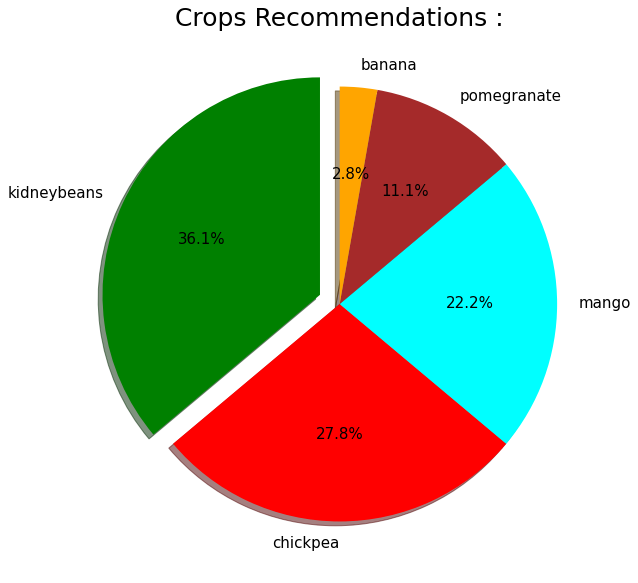

In [ ]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])
print(high.index.values,"\n")
plt.show()